# PROBLEM STATEMENT: Credit Default Prediction

Build a model to predict whether a given customer defaults or not. Credit default is one of the most important problems in the banking and risk analytics industry There are various attributes which can be used to predict default, such as demographic data (age,income,employmentstatus, etc.), (credit) behavioural data (past loans,payment,number of times a credit payment has been delayed by the customer etc.).

# 1. Data Understanding and Cleaning

In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the csv file:
df = pd.read_csv("credit_card_default.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
# Understanding the type of columns:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_0      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

As shown in the above output there are no major data issues, so model building can be done.

# 2. Data Preparation and Model Building

In [4]:
# Importing test_train_split from sklearn library
from sklearn.model_selection import train_test_split

In [5]:
# Putting feature variable to x:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

# Splitting the data into training and testing set:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=1)

# 3. Simple Decision Tree Model:

In [6]:
# importing Standard Scaler, DecisionTreeClassifier and make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline

In [7]:
# Pipeline Estimator to standardize x and using DecisionTreeClassifier with random_state=1 as model
pipeline = make_pipeline(StandardScaler(),DecisionTreeClassifier(random_state=1))

# fitting model on training data:
pipeline.fit(xtrain,ytrain)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=1))])

In [8]:
# Model Score on test and training data:
print("Model test Score: %.3f, " %pipeline.score(xtest,ytest),
     "Model trainig Score: %.3f, " %pipeline.score(xtrain,ytrain))

Model test Score: 0.723,  Model trainig Score: 1.000, 


# 4. Applying Bagging:

In [9]:
# import BaggingClassifier: 
from sklearn.ensemble import BaggingClassifier

#Instantiate the bagging classifier with base estimator as pipeline and random_state=1 
bgclassifier = BaggingClassifier(base_estimator=pipeline,random_state=1)

# fitting above model-on training data 
bgclassifier.fit(xtrain, ytrain)

# Model Score on test and training data:
print("Model test Score: %.3f, " %bgclassifier.score(xtest,ytest),
     "Model trainig Score: %.3f, " %bgclassifier.score(xtrain,ytrain))

Model test Score: 0.805,  Model trainig Score: 0.980, 


# Tunning BaggingClassifier

In [10]:
# importing GridSearchCV:
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import BaggingClassifier

# A dictionary with base estimator__max_depth from 1 to 20 with step size as 5 
# A max_samples with [0.05, 0.1, 0.2, 0.5] and max features form 1 to 20 with step size as 5
param_grid = {
    "base_estimator__max_depth": [1, 5, 10, 15, 20], 
    "max_samples": [0.05, 0.1, 0.2, 0.5],
    "max_features": [1, 5, 10, 15, 20]
}

# Instantiate gridsearch with BaggingClassifier with base estimator DecisionTreeClassifier and random state=1 
gs = GridSearchCV(
    BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=1), 
    param_grid, scoring="accuracy"
)

# fit grid search on training data
gs.fit(xtrain, ytrain)

GridSearchCV(estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                         random_state=1),
             param_grid={'base_estimator__max_depth': [1, 5, 10, 15, 20],
                         'max_features': [1, 5, 10, 15, 20],
                         'max_samples': [0.05, 0.1, 0.2, 0.5]},
             scoring='accuracy')

In [11]:
# printing best paramters selected by GridSearchCV
print("Optical hyperparameter combination: ",gs.best_params_)

# printing mean accuracy score on final tuned BaggingClassifier:
print("Mean cross-validated training accuracy score: ",gs.best_score_)

Optical hyperparameter combination:  {'base_estimator__max_depth': 5, 'max_features': 20, 'max_samples': 0.5}
Mean cross-validated training accuracy score:  0.8195238095238094


In [12]:
# Instantiate the bagging classifier with optimized parameters by grid search and random_state=1 
bgclassifier = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5), max_features=20, max_samples=0.5, random_state=1)

# fitting the above model on training data 
bgclassifier.fit(xtrain, ytrain)

# Model scores on test and training data
print('Model test Score: %.3f,' % bgclassifier.score(xtest, ytest),
      'Model training Score: %.3f,' % bgclassifier.score(xtrain, ytrain))

Model test Score: 0.818, Model training Score: 0.827,


# 5. RandomForestClassifier

In [13]:
# Importing RandomForestClassifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the RandomForestClassifier with default parameters, but random_state=1:
rfc = RandomForestClassifier(random_state=1)

# fit model on training data:
rfc.fit(xtrain,ytrain)

RandomForestClassifier(random_state=1)

In [14]:
# Making predictions:
ypred = rfc.predict(xtest)

In [15]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(ytest,ypred))
print(classification_report(ytest,ypred))
print(accuracy_score(ytest,ypred))

[[6631  369]
 [1297  703]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7000
           1       0.66      0.35      0.46      2000

    accuracy                           0.81      9000
   macro avg       0.75      0.65      0.67      9000
weighted avg       0.80      0.81      0.79      9000

0.8148888888888889


# Hyperparameter Tuning RandomForestClassifier

In [16]:
# import KFold
from sklearn.model_selection import KFold

# specify number od folds for kfold CV which is 5:
n_folds=5

# max_depth parameter with range (2,20,5):
parameters = {"max_depth":range(2,20,5)}

# instantiate the model RandomForestClassifier with random_state=1
rf = RandomForestClassifier(random_state=1)

# Instantiate GridSearchCV with rf, parameter, cv and scoring as accuracy and return train_test_score
rf = GridSearchCV(rf,parameters,cv=n_folds,scoring="accuracy",return_train_score=True)

# fit tree on training data:
rf.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': range(2, 20, 5)}, return_train_score=True,
             scoring='accuracy')

In [17]:
# Scores of GridSearchCV:
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.796506,0.051940,0.033113,0.004415,2,{'max_depth': 2},0.804286,0.791190,0.804286,0.809048,...,0.803048,0.006182,4,0.802440,0.807321,0.802024,0.802560,0.801012,0.803071,0.002194
1,2.055969,0.113339,0.049156,0.006852,7,{'max_depth': 7},0.823333,0.810952,0.823333,0.819286,...,0.820952,0.005688,1,0.837381,0.838869,0.837560,0.839464,0.835000,0.837655,0.001541
2,3.185468,0.242685,0.076876,0.007889,12,{'max_depth': 12},0.820952,0.812619,0.822857,0.819286,...,0.820810,0.005103,2,0.886548,0.891369,0.886071,0.884940,0.886369,0.887060,0.002226
3,4.011464,0.247274,0.106208,0.010349,17,{'max_depth': 17},0.826190,0.809762,0.815714,0.819286,...,0.819095,0.005973,3,0.929286,0.929464,0.928869,0.927798,0.928036,0.928690,0.000665


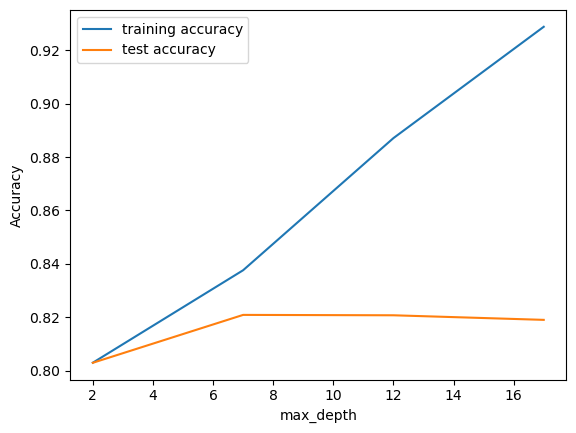

In [18]:
# plotting accuracies with max_depth:
plt.figure()
plt.plot(scores["param_max_depth"],
         scores["mean_train_score"],
         label="training accuracy")
plt.plot(scores["param_max_depth"],
         scores["mean_test_score"],
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [19]:
# parameters to build the model on (here n estimators with range(100, 1500, 400)) 
parameters = {'n_estimators': range(100, 1500, 400)}

# Instantiating the model (note we are specifying a max depth as 4) and random_state as 1 
rf = RandomForestClassifier(max_depth=6, random_state=1)

#Instantiating GridSearchCWwith rf, parameter, cv and scoring as accuracy and return_train_score as True 
rf = GridSearchCV(rf,parameters,cv=n_folds,scoring="accuracy",return_train_score=True)

# Fitting tree on training data
rf.fit(xtrain,ytrain)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=6, random_state=1),
             param_grid={'n_estimators': range(100, 1500, 400)},
             return_train_score=True, scoring='accuracy')

In [20]:
# scores of GridSearchCV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.808162,0.043639,0.051625,0.010966,100,{'n_estimators': 100},0.820000,0.808810,0.821667,0.817857,...,0.819000,0.005866,1,0.828393,0.831905,0.830298,0.829643,0.829405,0.829929,0.001162
1,9.265852,0.310345,0.216899,0.021747,500,{'n_estimators': 500},0.822143,0.808810,0.815952,0.818095,...,0.817810,0.005333,4,0.828750,0.830536,0.828036,0.829821,0.826488,0.828726,0.001411
2,16.372592,0.277364,0.376662,0.024466,900,{'n_estimators': 900},0.822619,0.809048,0.816667,0.818810,...,0.818286,0.005348,2,0.828631,0.831964,0.828333,0.831190,0.826488,0.829321,0.001998
3,23.071417,0.370947,0.541169,0.051710,1300,{'n_estimators': 1300},0.821905,0.809048,0.816429,0.819524,...,0.818238,0.005280,3,0.829702,0.831786,0.827560,0.831310,0.826667,0.829405,0.002014


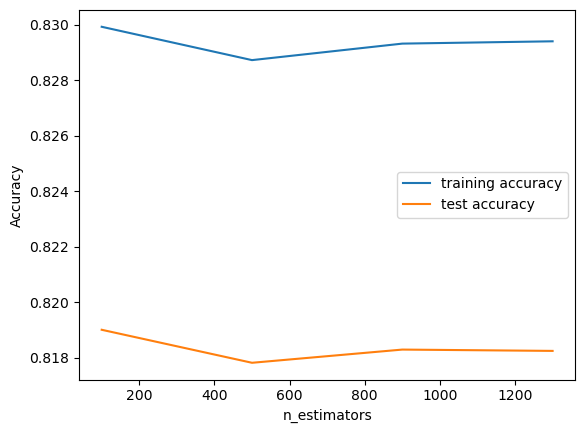

In [21]:
# plotting accuracies with n_estimators:
plt.figure()
plt.plot(scores["param_n_estimators"],
         scores["mean_train_score"],
         label="training accuracy")
plt.plot(scores["param_n_estimators"],
         scores["mean_test_score"],
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [22]:
# parameters to build the model on max_features with [4, 8, 14, 20, 24]
parameters = {'max_features': [4, 8, 14, 20, 24]}

# Instantiating the model (note we are specifying max_depth as 6) and random_state as 1
rf = RandomForestClassifier(max_depth=6, random_state=1)

# Instantiating GridSearchCV with rf, parameters, cv, scoring as accuracy, and return_train_score as True
rf = GridSearchCV(rf, parameters, cv=n_folds, scoring="accuracy", return_train_score=True)

# Fitting the grid search on training data
rf.fit(xtrain, ytrain)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=6, random_state=1),
             param_grid={'max_features': [4, 8, 14, 20, 24]},
             return_train_score=True, scoring='accuracy')

In [23]:
# scores of GridSearchCV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.819424,0.100937,0.048927,0.011323,4,{'max_features': 4},0.820000,0.808810,0.821667,0.817857,...,0.819000,0.005866,5,0.828393,0.831905,0.830298,0.829643,0.829405,0.829929,0.001162
1,3.229767,0.161011,0.048969,0.002934,8,{'max_features': 8},0.822381,0.813333,0.823810,0.819762,...,0.822143,0.005871,3,0.830655,0.832679,0.831012,0.832798,0.830238,0.831476,0.001060
2,5.325886,0.209652,0.043737,0.006250,14,{'max_features': 14},0.823810,0.814524,0.823095,0.819286,...,0.822333,0.005428,2,0.831786,0.834167,0.832083,0.835417,0.830714,0.832833,0.001709
3,7.465835,0.258326,0.037488,0.007650,20,{'max_features': 20},0.823333,0.814762,0.824762,0.818571,...,0.822571,0.005671,1,0.832738,0.834643,0.832798,0.836607,0.831786,0.833714,0.001717
4,8.878488,0.237185,0.040609,0.007661,24,{'max_features': 24},0.822381,0.815000,0.823095,0.820238,...,0.822095,0.004768,4,0.833869,0.835179,0.833274,0.837321,0.832083,0.834345,0.001791


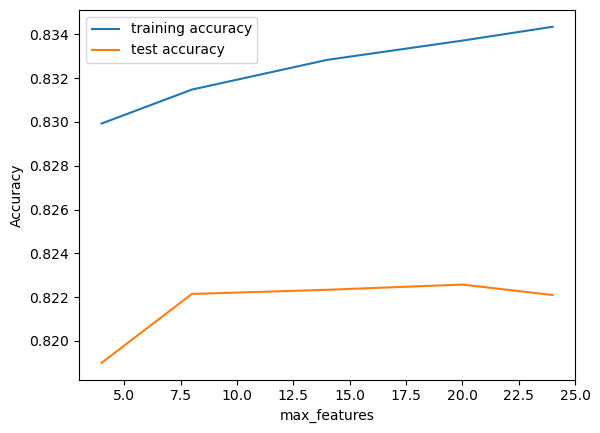

In [24]:
# plotting accuracies with max_features:
plt.figure()
plt.plot(scores["param_max_features"],
         scores["mean_train_score"],
         label="training accuracy")
plt.plot(scores["param_max_features"],
         scores["mean_test_score"],
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [25]:
# parameters to build the model on min_samples_leaf of range (100,400,50)
parameters = {'min_samples_leaf': range(100,400,50)}

# Instantiating the model (not specifying any max_depth) and random_state as 1
rf = RandomForestClassifier(random_state=1)

# Instantiating GridSearchCV with rf, parameters, cv, scoring as accuracy, and return_train_score as True
rf = GridSearchCV(rf, parameters, cv=n_folds, scoring="accuracy", return_train_score=True)

# Fitting the grid search on training data
rf.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'min_samples_leaf': range(100, 400, 50)},
             return_train_score=True, scoring='accuracy')

In [26]:
# scores of GridSearchCV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.437391,0.034993,0.059229,0.006191,100,{'min_samples_leaf': 100},0.819048,0.805476,0.821190,0.818571,...,0.818238,0.007035,1,0.819940,0.823810,0.822976,0.823333,0.820060,0.822024,0.001674
1,2.223548,0.117513,0.053111,0.007653,150,{'min_samples_leaf': 150},0.817857,0.803571,0.815952,0.819048,...,0.816571,0.007407,2,0.815655,0.816369,0.817619,0.820000,0.816548,0.817238,0.001517
2,2.087311,0.113313,0.055528,0.008592,200,{'min_samples_leaf': 200},0.814048,0.802381,0.813333,0.814048,...,0.812571,0.005490,3,0.813452,0.816071,0.812976,0.811845,0.811488,0.813167,0.001620
3,1.927922,0.101375,0.048019,0.002318,250,{'min_samples_leaf': 250},0.813333,0.800714,0.811667,0.814762,...,0.811905,0.006108,4,0.813333,0.815595,0.811429,0.812321,0.811310,0.812798,0.001577
4,1.796765,0.036449,0.048713,0.003710,300,{'min_samples_leaf': 300},0.812619,0.799286,0.809048,0.814762,...,0.810857,0.006558,5,0.811607,0.813988,0.809940,0.811667,0.810000,0.811440,0.001476


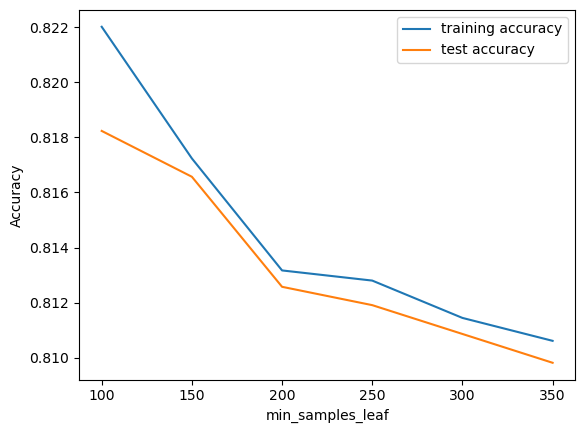

In [28]:
# plotting accuracies with min_samples_leaf:
plt.figure()
plt.plot(scores["param_min_samples_leaf"],
         scores["mean_train_score"],
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"],
         scores["mean_test_score"],
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [29]:
# parameters to build the model on min_samples_split of range (200,500,50)
parameters = {'min_samples_split': range(200,500,50)}

# Instantiating the model (not specifying any max_depth) and random_state as 1
rf = RandomForestClassifier(random_state=1)

# Instantiating GridSearchCV with rf, parameters, cv, scoring as accuracy, and return_train_score as True
rf = GridSearchCV(rf, parameters, cv=n_folds, scoring="accuracy", return_train_score=True)

# Fitting the grid search on training data
rf.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'min_samples_split': range(200, 500, 50)},
             return_train_score=True, scoring='accuracy')

In [30]:
# scores of GridSearchCV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.357631,0.209157,0.072886,0.014131,200,{'min_samples_split': 200},0.822381,0.813333,0.823333,0.817857,...,0.821810,0.006275,2,0.827381,0.828571,0.826786,0.828988,0.825357,0.827417,0.001300
1,3.333345,0.207151,0.064192,0.001209,250,{'min_samples_split': 250},0.823095,0.812143,0.821905,0.820238,...,0.821952,0.006469,1,0.825774,0.827738,0.825119,0.827143,0.823631,0.825881,0.001463
2,3.154933,0.116253,0.059378,0.006243,300,{'min_samples_split': 300},0.823095,0.812857,0.822619,0.818571,...,0.821714,0.006090,4,0.824762,0.827202,0.824226,0.825060,0.822798,0.824810,0.001427
3,2.956114,0.155690,0.053543,0.007033,350,{'min_samples_split': 350},0.822619,0.811905,0.822143,0.820238,...,0.821810,0.006452,2,0.824464,0.825238,0.823452,0.824464,0.821786,0.823881,0.001191
4,3.056741,0.538652,0.060020,0.006688,400,{'min_samples_split': 400},0.821905,0.810714,0.820714,0.820000,...,0.820952,0.006579,6,0.823452,0.824702,0.823512,0.823393,0.821131,0.823238,0.001160


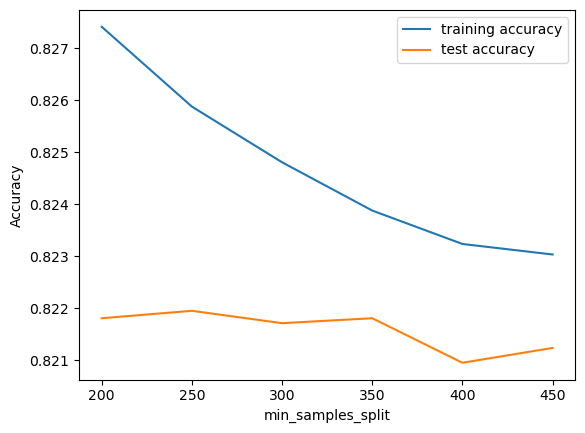

In [31]:
# plotting accuracies with min_samples_split:
plt.figure()
plt.plot(scores["param_min_samples_split"],
         scores["mean_train_score"],
         label="training accuracy")
plt.plot(scores["param_min_samples_split"],
         scores["mean_test_score"],
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [33]:
# import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Creating the parameter grid based on the results of random search
param_grid = {
    "max_depth": [4, 8, 10],
    "max_features": [5, 10],
    "min_samples_leaf": [100, 300],
    "min_samples_split": [200, 400],
    "n_estimators": [100, 200, 300]
}

# Creating a base model (i.e. RF) with random_state=1
rf = RandomForestClassifier(random_state=1)

# Instantiating the RandomizedSearchCV model with estimator, param_distributions, and random_state=1
rs = RandomizedSearchCV(rf, param_distributions=param_grid, random_state=1)

In [34]:
# Fitting the Grid Search to the data:
rs.fit(xtrain,ytrain)

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=1),
                   param_distributions={'max_depth': [4, 8, 10],
                                        'max_features': [5, 10],
                                        'min_samples_leaf': [100, 300],
                                        'min_samples_split': [200, 400],
                                        'n_estimators': [100, 200, 300]},
                   random_state=1)

In [35]:
# printing the optimal accuracy score and hyperparameters
print("The accuracy is of",rs.best_score_,"using",rs.best_params_)

The accuracy is of 0.8214285714285715 using {'n_estimators': 100, 'min_samples_split': 400, 'min_samples_leaf': 100, 'max_features': 10, 'max_depth': 8}


In [37]:
# Instantiate RF model with best hyperparamters along with random_state as 1:
rfc = RandomForestClassifier(n_estimators=100, min_samples_split=400, min_samples_leaf=100, max_features=10, max_depth=8)

In [38]:
# Fitting on training data:
rfc.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=8, max_features=10, min_samples_leaf=100,
                       min_samples_split=400)

In [39]:
# Prediction
ypred = rfc.predict(xtest)

In [40]:
# Evaluation using metrics:
print(confusion_matrix(ytest,ypred))
print(classification_report(ytest,ypred))
print(accuracy_score(ytest,ypred))

[[6664  336]
 [1301  699]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7000
           1       0.68      0.35      0.46      2000

    accuracy                           0.82      9000
   macro avg       0.76      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000

0.8181111111111111


# 6. ExtraTrees Algorithm

In [41]:
# Importing ExtraTreeClassifier:
from sklearn.ensemble import ExtraTreesClassifier

# Instantiate ExtraTreesClassifier with default parameters except random_state=1:
et = ExtraTreesClassifier(random_state=1)

# fitting model on training data:
et.fit(xtrain,ytrain)

ExtraTreesClassifier(random_state=1)

In [42]:
# Predictions:
ypred = et.predict(xtest)

In [43]:
# Evaluation using metrics:
print(confusion_matrix(ytest,ypred))
print(classification_report(ytest,ypred))
print(accuracy_score(ytest,ypred))

[[6599  401]
 [1283  717]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7000
           1       0.64      0.36      0.46      2000

    accuracy                           0.81      9000
   macro avg       0.74      0.65      0.67      9000
weighted avg       0.79      0.81      0.79      9000

0.8128888888888889


In [44]:
# Creating the parameter grid similar to RandomForest
param_grid = {
    "max_depth": [4, 8, 10],
    "max_features": [5, 10],
    "min_samples_leaf": [100, 300],
    "min_samples_split": [200, 400],
    "n_estimators": [100, 200, 300]
}

# Instantiating the RandomizedSearchCV model with et, param_distributions, and random_state=1
rs = RandomizedSearchCV(et, param_distributions=param_grid, random_state=1)

# fitting the random search on training data:
rs.fit(xtrain,ytrain)

# printing the optimal accuracy score and hyperparameters
print("The accuracy is of",rs.best_score_,"using",rs.best_params_)

The accuracy is of 0.8156190476190476 using {'n_estimators': 100, 'min_samples_split': 400, 'min_samples_leaf': 100, 'max_features': 10, 'max_depth': 8}


In [45]:
# Instantiate ExtraTreesClassifier with default parameters:
et = ExtraTreesClassifier(n_estimators=100, min_samples_split=400, min_samples_leaf=100, max_features=10, max_depth=8)

# Fitting model on training data:
et.fit(xtrain,ytrain)

ExtraTreesClassifier(max_depth=8, max_features=10, min_samples_leaf=100,
                     min_samples_split=400)

In [46]:
# Prediction
ypred = et.predict(xtest)

In [47]:
# Evaluation using metrics:
print(confusion_matrix(ytest,ypred))
print(classification_report(ytest,ypred))
print(accuracy_score(ytest,ypred))

[[6739  261]
 [1445  555]]
              precision    recall  f1-score   support

           0       0.82      0.96      0.89      7000
           1       0.68      0.28      0.39      2000

    accuracy                           0.81      9000
   macro avg       0.75      0.62      0.64      9000
weighted avg       0.79      0.81      0.78      9000

0.8104444444444444
